# Medical research

## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids
5,6,22,Male,Sore throat,Fever,Cough,90,39.5,107/92,93,Flu,Moderate,Medication and rest
6,7,21,Male,Sore throat,Fatigue,Cough,71,37.5,126/82,93,Bronchitis,Severe,Hospitalization and medication
7,8,71,Male,Headache,Shortness of breath,Runny nose,64,38.6,153/99,99,Healthy,Mild,Rest and fluids
8,9,56,Female,Shortness of breath,Fever,Headache,103,36.2,152/71,96,Cold,Mild,Rest and fluids
9,10,53,Male,Cough,Fever,Headache,62,39.5,111/104,98,Flu,Moderate,Medication and rest


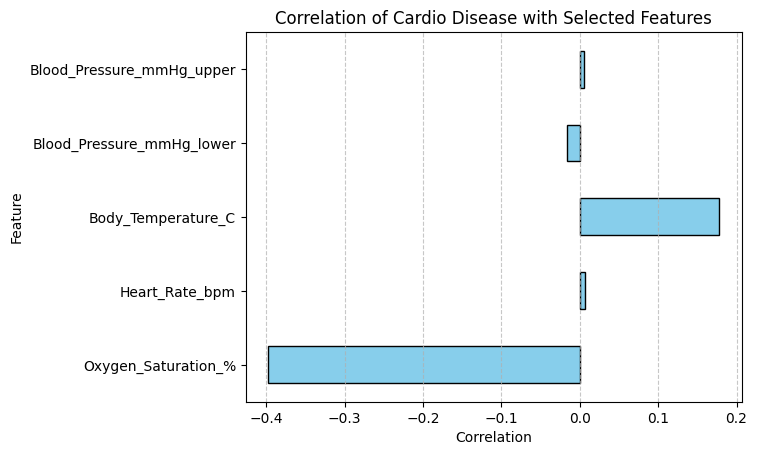

In [2]:
# Medical research
data = pd.read_csv('../resources/medical/disease_diagnosis.csv')

display(data.head(10))

data['Blood_Pressure_mmHg_lower'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) and '/' in x else None)
data['Blood_Pressure_mmHg_upper'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) and '/' in x else None)


selected_fields = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Blood_Pressure_mmHg_lower', 'Blood_Pressure_mmHg_upper']

data['treatment_plan_int'] = data['Treatment_Plan'].map({'Medication and rest': 1, 
                                                         'Rest and fluids': 0, 
                                                         'Hospitalization and medication': 2})

correlation_results = data[selected_fields].corrwith(data["treatment_plan_int"])

correlation_results.plot(kind="barh", color="skyblue", edgecolor="black")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title("Correlation of Cardio Disease with Selected Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [3]:
print(min(data['Body_Temperature_C']), max(data['Body_Temperature_C']))
data['Body_Temperature_C_scaled'] = (data['Body_Temperature_C'] - min(data['Body_Temperature_C'])) / (max(data['Body_Temperature_C']) - min(data['Body_Temperature_C']))

35.5 40.0


2000 2000
Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       267
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        75

    accuracy                           0.67       400
   macro avg       0.22      0.33      0.27       400
weighted avg       0.45      0.67      0.53       400



c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

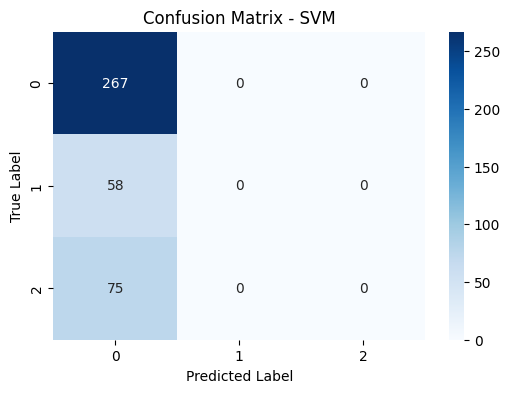

In [4]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

numerical_features = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper', 'Blood_Pressure_mmHg_lower', 'Age']

X = data[numerical_features]
y = data['treatment_plan_int']

print(len(X), len(y)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# initialize svm classifier
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# confusion matrix:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

# Ensamble model application: XGBoost

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,...,Severity,Treatment_Plan,Blood_Pressure_mmHg_lower,Blood_Pressure_mmHg_upper,Body_Temperature_C_scaled,Gender_encoded,Treatment_Plan_encoded,Symptom_1_encoded,Symptom_2_encoded,Symptom_3_encoded
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,...,Moderate,Medication and rest,91,132,0.866667,1,1,2,7,3
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,...,Mild,Rest and fluids,98,174,0.777778,0,2,7,2,1
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,...,Mild,Rest and fluids,60,136,0.288889,1,2,0,7,2
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,...,Mild,Rest and fluids,82,147,0.755556,0,2,6,4,1
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,...,Mild,Rest and fluids,106,109,0.244444,1,2,5,7,2
5,6,22,Male,Sore throat,Fever,Cough,90,39.5,107/92,93,...,Moderate,Medication and rest,92,107,0.888889,1,1,7,3,1
6,7,21,Male,Sore throat,Fatigue,Cough,71,37.5,126/82,93,...,Severe,Hospitalization and medication,82,126,0.444444,1,0,7,2,1
7,8,71,Male,Headache,Shortness of breath,Runny nose,64,38.6,153/99,99,...,Mild,Rest and fluids,99,153,0.688889,1,2,4,6,5
8,9,56,Female,Shortness of breath,Fever,Headache,103,36.2,152/71,96,...,Mild,Rest and fluids,71,152,0.155556,0,2,6,3,4
9,10,53,Male,Cough,Fever,Headache,62,39.5,111/104,98,...,Moderate,Medication and rest,104,111,0.888889,1,1,1,3,4


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       1.00      0.95      0.97        58
           2       1.00      1.00      1.00       267

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.99      0.99       400



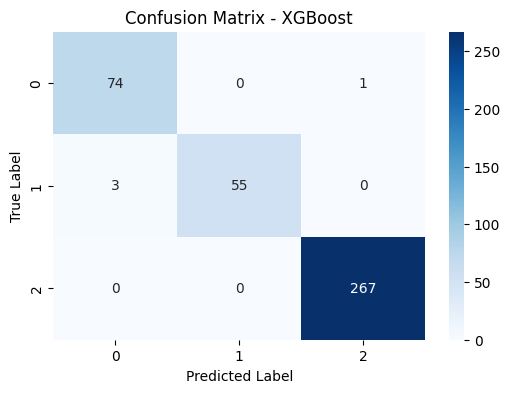

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


data = pd.read_csv('../resources/medical/disease_diagnosis.csv')

# Data Encoding
data['Blood_Pressure_mmHg_lower'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) and '/' in x else None)
data['Blood_Pressure_mmHg_upper'] = data['Blood_Pressure_mmHg'].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) and '/' in x else None)
data['Body_Temperature_C_scaled'] = (data['Body_Temperature_C'] - min(data['Body_Temperature_C'])) / (max(data['Body_Temperature_C']) - min(data['Body_Temperature_C']))


data['Gender_encoded'] = le.fit_transform(data['Gender'])
data['Treatment_Plan_encoded'] = le.fit_transform(data['Treatment_Plan'])
data['Symptom_1_encoded'] = le.fit_transform(data['Symptom_1'])
data['Symptom_2_encoded'] = le.fit_transform(data['Symptom_2'])
data['Symptom_3_encoded'] = le.fit_transform(data['Symptom_3'])

display(data.head(10))

features = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper', 'Blood_Pressure_mmHg_lower', 'Age', 
                      'Gender_encoded', 'Symptom_1_encoded', 'Symptom_2_encoded', 'Symptom_3_encoded']

# Load dataset
X = data[features]
y = data['Treatment_Plan_encoded']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create XGBoost model (scikit-learn style)
model = XGBClassifier(
    n_estimators=100,        # number of trees
    learning_rate=0.1,       # step size shrinkage
    max_depth=3,             # depth of trees
    subsample=0.8,           # fraction of samples used per tree
    colsample_bytree=0.8,    # fraction of features used per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'   # avoids warning
)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Random Forest (?)

Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       267
           1       0.36      0.24      0.29        58
           2       0.44      0.29      0.35        75

    accuracy                           0.66       400
   macro avg       0.51      0.46      0.47       400
weighted avg       0.62      0.66      0.63       400



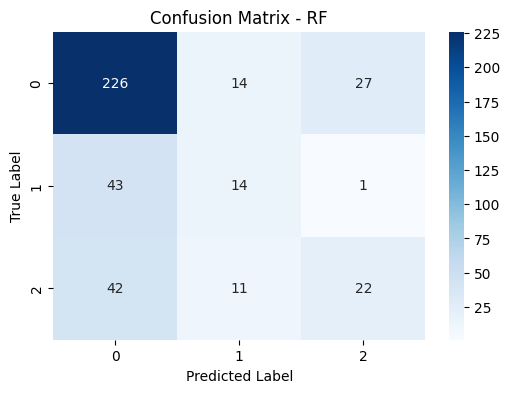

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
X = data[numerical_features]
y = data['treatment_plan_int']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF")
plt.show()

TODO:
- CNN (?) 
- More data, include symptoms, one hot encoding for symptoms 
- nlp for symptoms, transformers ?
- encoding for str features, + gridsearch improve + bayesian hyperparameter tuning

**Grid search hyperparameter tuning**

2000 2000
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
Accuracy: 0.9600
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        75
           1       1.00      0.83      0.91        58
           2       0.95      1.00      0.98       267

    accuracy                           0.96       400
   macro avg       0.97      0.92      0.94       400
weighted avg       0.96      0.96      0.96       400



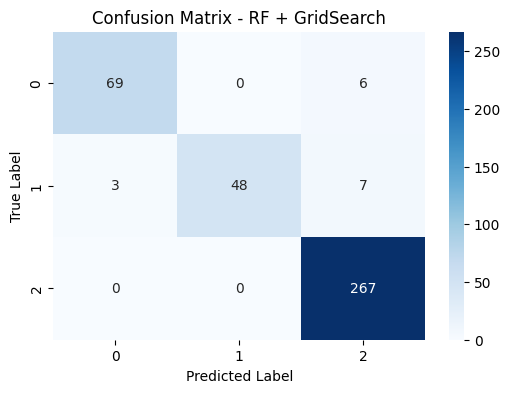

In [14]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

le = LabelEncoder()



data['Gender_encoded'] = le.fit_transform(data['Gender'])
data['Treatment_Plan_encoded'] = le.fit_transform(data['Treatment_Plan'])
data['Symptom_1_encoded'] = le.fit_transform(data['Symptom_1'])
data['Symptom_2_encoded'] = le.fit_transform(data['Symptom_2'])
data['Symptom_3_encoded'] = le.fit_transform(data['Symptom_3'])


numerical_features = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper', 'Blood_Pressure_mmHg_lower', 'Age', 'Gender_encoded',
                      'Symptom_1_encoded', 'Symptom_2_encoded', 'Symptom_3_encoded']

X = data[numerical_features]
y = data['Treatment_Plan_encoded']

print(len(X), len(y)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "n_estimators": [100, 150, 200, 250, 300],
    "max_depth": [None, 10, 15, 20, 25, 30],
    "min_samples_split": [2, 5, 7],
    "min_samples_leaf": [1, 2, 3, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 

# # initialize svm classifier
# svm_model = SVC(kernel="rbf", probability=True, random_state=42)
# svm_model.fit(X_train, y_train)

# y_pred = svm_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, grid_predictions):.4f}")
print(classification_report(y_test, grid_predictions))

# confusion matrix:
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF + GridSearch")
plt.show()

## XGBoost (to reduce data bias) + Bayessian Hyperparameter tunning (to find the most optimal hyperparameters with least o(n))

2000 2000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, tota

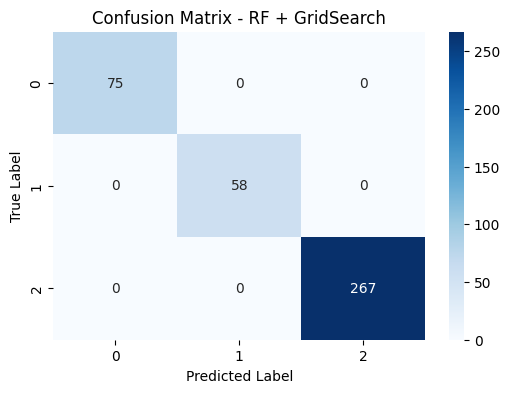

In [16]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from skopt import BayesSearchCV

le = LabelEncoder()



data['Gender_encoded'] = le.fit_transform(data['Gender'])
data['Treatment_Plan_encoded'] = le.fit_transform(data['Treatment_Plan'])
data['Symptom_1_encoded'] = le.fit_transform(data['Symptom_1'])
data['Symptom_2_encoded'] = le.fit_transform(data['Symptom_2'])
data['Symptom_3_encoded'] = le.fit_transform(data['Symptom_3'])


numerical_features = ['Oxygen_Saturation_%', 'Heart_Rate_bpm', 'Body_Temperature_C_scaled',
                      'Blood_Pressure_mmHg_upper', 'Blood_Pressure_mmHg_lower', 'Age', 'Gender_encoded',
                      'Symptom_1_encoded', 'Symptom_2_encoded', 'Symptom_3_encoded']

X = data[numerical_features]
y = data['Treatment_Plan_encoded']

print(len(X), len(y)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_space = {
    # Tree parameters
    "max_depth": [3, 4, 5, 6, 8, 10],
    "min_child_weight": [1, 2, 3, 5, 7, 10],
    # "gamma": [0, 0.1, 0.2, 0.3, 0.5],
    # "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    # "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],

    # Learning parameters
    # "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100, 200, 400, 600, 800, 1000],

    # Regularization
    # "reg_alpha": [0, 0.001, 0.01, 0.1, 1],
    # "reg_beta": [0, 0.001, 0.01, 0.1, 1],  # (older versions use reg_lambda)
    # "lambda": [0, 0.001, 0.01, 0.1, 1],

    # Imbalance handling
    # "scale_pos_weight": [1, 2, 3, 5, 10, 20],

    # Tree construction algorithm
    # "tree_method": ["auto", "exact", "approx", "hist"],
}

grid = BayesSearchCV(XGBClassifier(), param_space, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 

# # initialize svm classifier
# svm_model = SVC(kernel="rbf", probability=True, random_state=42)
# svm_model.fit(X_train, y_train)

# y_pred = svm_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, grid_predictions):.4f}")
print(classification_report(y_test, grid_predictions))

# confusion matrix:
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2"], yticklabels=["0", "1", "2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF + GridSearch")
plt.show()

## Todo

- add nlp (use datasets - which ones?)
- 

## Applying NLP for medical data

In [1]:
import pandas as pd

data = pd.read_csv('../resources/medical/Diseases_Symptoms.csv')
display(data.head(10))
print(data.info())

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
0,Gestational Cholestasis,"Itchy skin, particularly on the hands and feet",NaN,D001,False,False
1,Injury to Internal Organ,"Abdominal pain, bleeding, organ dysfunction","Immediate medical attention, diagnostic tests,...",D002,False,False
2,Scabies,"Intense itching, especially at night, small bl...",Prescription medications (topical or oral scab...,D003,False,True
3,Congenital Glaucoma,"Cloudy or hazy eyes, excessive tearing, sensit...","Surgery (e.g., trabeculotomy, goniotomy) to cr...",D004,False,True
4,Avoidant/Restrictive Food Intake Disorder (ARFID),Avoidance or restriction of certain foods or e...,"Nutritional counseling, psychotherapy (such as...",D005,False,True
5,Subdural hemorrhage,"Headache, confusion, dizziness, nausea or vomi...","Immediate medical attention, close monitoring ...",D006,False,True
6,Poisoning due to Antidepressants,"Nausea, vomiting, drowsiness, dizziness, confu...",Seek immediate medical assistance or contact a...,D007,False,True
7,Mittelschmerz,Lower abdominal pain and discomfort occurring ...,Pain management (over-the-counter pain relieve...,D008,False,True
8,Cornea Infection,"Eye redness, pain or discomfort, blurred or de...","Antibiotic or antifungal eye drops, oral medic...",D009,False,True
9,Myopia,"Blurred distance vision, eyestrain, squinting","Eyeglasses, contact lenses, refractive surgery...",D010,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          405 non-null    object
 1   Symptoms      405 non-null    object
 2   Treatments    404 non-null    object
 3   Disease_Code  405 non-null    object
 4   Contagious    405 non-null    bool  
 5   Chronic       405 non-null    bool  
dtypes: bool(2), object(4)
memory usage: 13.6+ KB
None


In [2]:
import gensim.downloader as api

corpus = api.load('glove-wiki-gigaword-100')

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\utils.py:35: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  import scipy.sparse


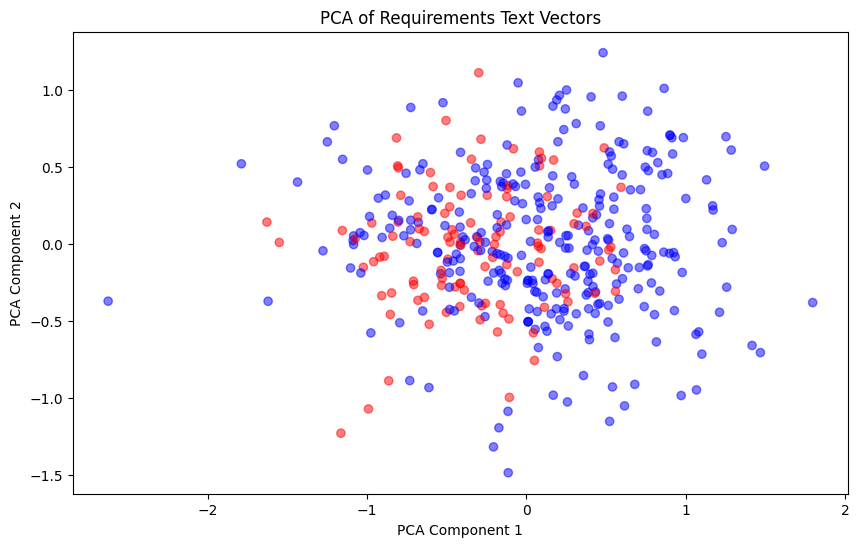

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.decomposition import PCA
import numpy as np

def vectorize_text(text):
    words = word_tokenize(text.lower())
    word_vectors = []
    for word in words:
        if word in corpus:
            word_vectors.append(corpus[word])
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros(corpus.vector_size)
    return text_vector

data['Text_Vector'] = data['Symptoms'].apply(str).apply(vectorize_text)
# display(data[['Email Text', 'Text_Vector']].head())

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
text_vectors = np.vstack(data['Text_Vector'].values)
reduced_vectors = pca.fit_transform(text_vectors)
data['PCA_1'] = reduced_vectors[:, 0]
data['PCA_2'] = reduced_vectors[:, 1]

colors = data["Contagious"].map({True: "red", False: "blue"})

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['PCA_1'], data['PCA_2'], c=colors, alpha=0.5)
plt.title('PCA of Requirements Text Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


## Apply ML to forecasting disease diagnosis

405 405
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        58
           1       0.78      0.61      0.68        23

    accuracy                           0.84        81
   macro avg       0.82      0.77      0.79        81
weighted avg       0.83      0.84      0.83        81



c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:31:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


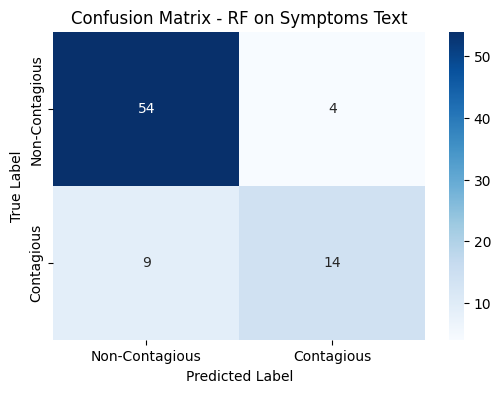

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from xgboost import XGBClassifier

def vectorize_text(text):
    words = word_tokenize(text.lower())
    word_vectors = []
    for word in words:
        if word in corpus:
            word_vectors.append(corpus[word])
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros(corpus.vector_size)
    return text_vector

data['Text_Vector'] = data['Symptoms'].apply(str).apply(vectorize_text)

X = np.vstack(data['Text_Vector'].values)
y = data['Contagious'].astype(int)
print(len(X), len(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestClassifier(n_estimators=100, random_state=42)
model = XGBClassifier(
    n_estimators=100,        # number of trees
    learning_rate=0.1,       # step size shrinkage
    max_depth=3,             # depth of trees
    subsample=0.8,           # fraction of samples used per tree
    colsample_bytree=0.8,    # fraction of features used per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'   # avoids warning
)

# Train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Contagious", "Contagious"], yticklabels=["Non-Contagious", "Contagious"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RF on Symptoms Text")
plt.show()
